In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [65]:
bio_data2 = pd.read_csv(r'C:\Users\ryanj\Desktop\CSA2025\data\bio_data2.csv')
bio_data2.head()

,age,systolic_BP,diastolic_BP,LDL_cholesterol,HDL_cholesterol,height,weight,BMI,waist_circumference,hip_circumference,...,SNP_993,SNP_994,SNP_995,SNP_996,SNP_997,SNP_998,SNP_999,SNP_1000,sex_Female,sex_Male
0,0.812959,-0.606279,0.444187,1.172468,-1.039078,0.679301,0.090362,-0.336726,-0.507418,-1.610935,...,1,1,2,2,0,2,1,1,0.0,1.0
1,1.680578,1.095283,-0.377477,-0.548804,0.161857,0.833478,0.636477,0.162759,1.193366,0.222913,...,2,0,0,0,1,0,2,0,0.0,1.0
2,0.145560,0.101649,0.185789,0.933073,-0.471807,1.218919,-0.229065,-1.004657,0.466989,-0.302641,...,1,1,1,2,1,1,0,1,0.0,1.0
3,-0.788799,0.274759,-0.446832,-0.261840,-0.254707,-1.016640,-1.517073,-1.312590,-0.294820,-0.906469,...,2,1,1,0,1,0,0,2,1.0,0.0
4,1.079919,-0.848938,1.276010,-1.287763,2.616544,1.450184,1.136224,0.248922,1.397105,0.491281,...,1,1,1,2,1,1,1,0,0.0,1.0


## setting the X variables and Y Target  

In [66]:
X = bio_data2.drop(['BMI'], axis=1)
Y = bio_data2['BMI']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2, random_state=7)

In [69]:
X_train.shape

(800, 1012)

In [70]:
Y_train.shape

(800,)

## Import Model training modules

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [72]:
rfr_model = RandomForestRegressor(
    n_estimators=100,
    
)
rfr_model.fit(X_train, Y_train)

RandomForestRegressor()

In [73]:
Y_pred = rfr_model.predict(X_test)

## Import performance assessment modules

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
print("Mean squared error: %.5f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination: %.5f" % r2_score(Y_test, Y_pred))

Mean squared error: 0.01713
Coefficient of determination: 0.98211


## Hyperparameter Tuning

In [76]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [ 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
rfr_modelCV = GridSearchCV(estimator=rfr_model, param_grid = param_grid, cv = 3, scoring='neg_mean_squared_error', n_jobs=-1)

In [79]:
rfr_modelCV.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [80]:
Y_predCV = rfr_modelCV.predict(X_test)

In [81]:
print("Mean squared error: %.5f" % mean_squared_error(Y_test, Y_predCV))
print("Coefficient of determination: %.5f" % r2_score(Y_test, Y_predCV))

Mean squared error: 0.01701
Coefficient of determination: 0.98224


## Predicted vs Actual Plot

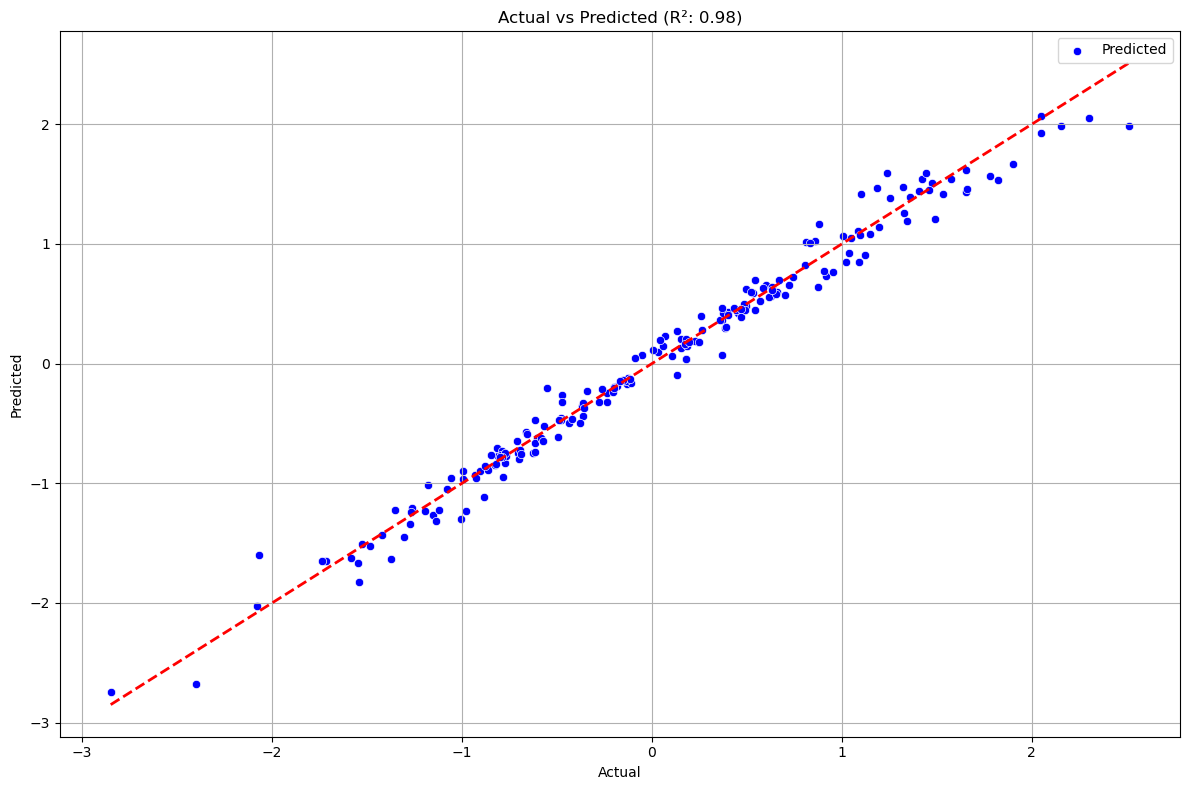

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(x=Y_test, y=Y_predCV, ax=ax, color='blue', label='Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted (R²: {r2_score(Y_test, Y_pred):.2f})')
plt.grid(True)
plt.tight_layout()

## Residual plot

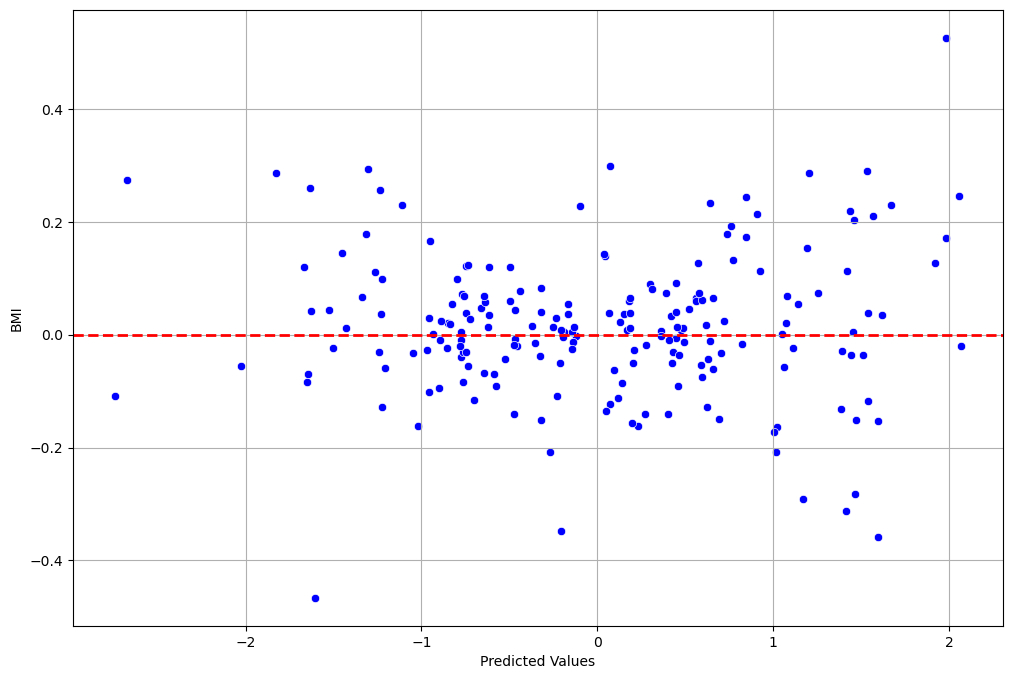

In [83]:
residuals = Y_test - Y_predCV

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=Y_predCV, y=residuals, ax=ax, color='blue')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')  
plt.grid(True)

## Feature Importance

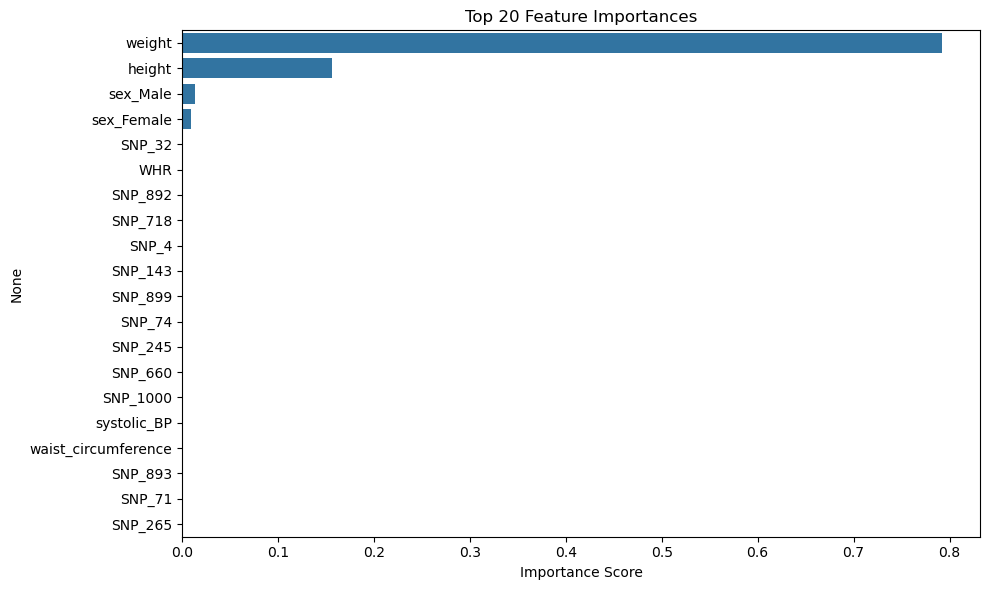

In [86]:
feature_importance = pd.Series(rfr_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()